In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from fugitive_interceptions.networks import manhattan_graph as graph_func

graph, labels, pos = graph_func(N=10)

In [7]:
def draw_edges(graph, fugitive_routes):
    edges_fugitive = []

    for r, _ in enumerate(fugitive_routes):
        route = fugitive_routes[r]
        for t in range(1, len(route)):
            edges_fugitive1 = [(route[t], route[t-1])]
            edges_fugitive2 = [(route[t-1], route[t])]
            edges_fugitive.extend(tuple(edges_fugitive1))
            edges_fugitive.extend(tuple(edges_fugitive2))

    edge_colormap = ['lightgray'] * len(graph.edges())
    edge_weightmap = [1] * len(graph.edges())
    for index, edge in enumerate(graph.edges()):
        if edge in edges_fugitive:
            edge_colormap[index] = 'tab:orange'
            edge_weightmap[index] = 2

    return edge_colormap, edge_weightmap

In [8]:
def draw_nodes(graph, fugitive_start, unit_start, sensor_locations):
    node_colormap = ['lightgray']*len(graph.nodes)
    node_weightmap = [1]*len(graph.nodes)

    for index, node in enumerate(graph.nodes()):
        # if node in sensor_locations:
        #     node_colormap[index] = '#4caf50'
        #     node_weightmap[index] = 100
        if node == fugitive_start:
            node_colormap[index] = 'tab:orange'
            node_weightmap[index] = 100
        elif node in unit_start:
            node_colormap[index] = 'tab:blue'
            node_weightmap[index] = 100

    return node_colormap, node_weightmap

In [9]:
def plot_result(graph, pos, fugitive_start, fugitive_routes, unit_start, sensor_locations, rep):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5)) #, gridspec_kw={'height_ratios': [1, 0.6]})
    node_colormap, node_weightmap = draw_nodes(graph, fugitive_start, unit_start, sensor_locations)
    edge_colormap, edge_weightmap = draw_edges(graph, fugitive_routes)

    nx.draw_networkx_nodes(G=graph, pos=pos,
                           node_color=node_colormap, alpha=0.9, node_size=node_weightmap,
                           node_shape=matplotlib.markers.MarkerStyle(marker='o', fillstyle='full'), ax=ax)

    #nx.draw_networkx_labels(G=graph, pos=pos, labels=labels_at_step, font_size=10, ax=ax[0])

    nx.draw_networkx_edges(G=graph, pos=pos, edge_color=edge_colormap, width=edge_weightmap, alpha=0.9, ax=ax)

    #ax[0] = plt.gca()
    #ax[0].set_aspect('equal')
    #ax[0].set_facecolor('white')

    # legend
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='pursuer',
                              markerfacecolor='tab:blue', markersize=8),
                       Line2D([0], [0], marker='o', color='w', label='evader',
                              markerfacecolor='tab:orange', markersize=8)
                       # , Line2D([0], [0], marker='o', color='w', label='sensor',
                       #        markerfacecolor='#4caf50', markersize=8)
                       ]

    #plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 1.6))

    plt.savefig('figs/startconfig_nosensor_routes_'+ str(rep) + '.png', bbox_inches='tight')

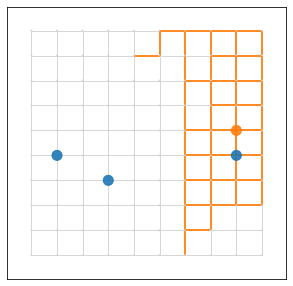

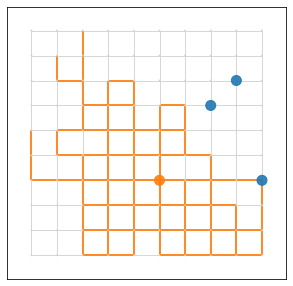

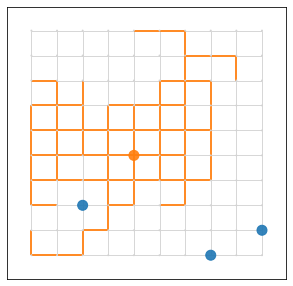

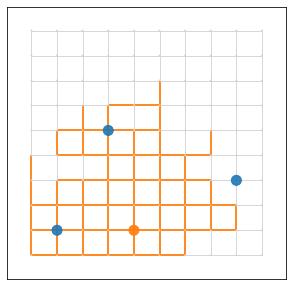

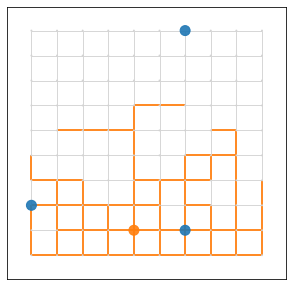

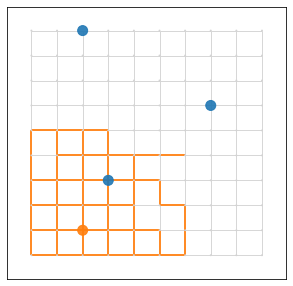

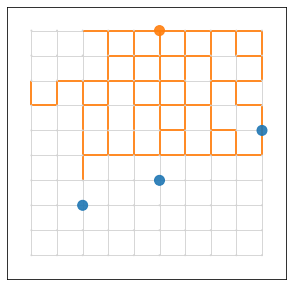

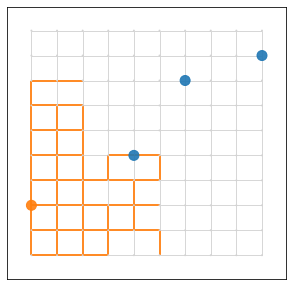

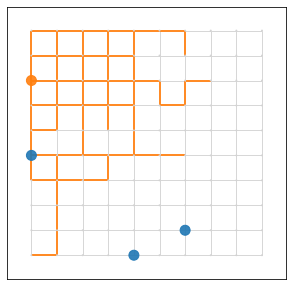

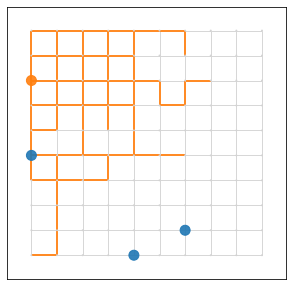

In [10]:
results = pd.DataFrame(columns=['start_units', 'start_fugitive', 'sensors', 'rep'])
best_score_per_rep = {}

num_seeds = 10
num_reps = 10

#for rep in range(num_reps):
for rep in range(num_reps):
    snapshots = pd.read_pickle(r'results/routes_db/snapshots_rep{}_seed0.pkl'.format(rep))
    start_fugitive = pd.read_pickle(r'results/routes_db/start_fug_rep{}_seed0.pkl'.format(rep))
    fugitive_routes = pd.read_pickle(r'results/routes_db/routes_fug_rep{}_seed0.pkl'.format(rep))
    start_units = pd.read_pickle(r'results/routes_db/start_units_rep{}_seed0.pkl'.format(rep))
    sensors = pd.read_pickle(r'results/routes_db/sensors_rep{}_seed0.pkl'.format(rep))

    plot_result(graph=graph, pos=pos, fugitive_start=start_fugitive, fugitive_routes=fugitive_routes, unit_start=start_units, sensor_locations=sensors, rep=rep)

In [11]:
start_fugitive

(0, 7)

In [12]:
start_units

[(4, 0), (6, 1), (0, 4)]

In [13]:
sensors

[(1, 8), (9, 6), (0, 8)]

In [14]:


len(edges_fugitive)

NameError: name 'edges_fugitive' is not defined

In [ ]:
for node in graph.nodes():
    print(node)